Insight 1: Average Total COVID-19 Cases per Million by Continent:
               total_cases_per_million
continent                             
Europe                   391102.447021
Oceania                  242960.979304
North America            235137.278195
South America            187920.542071
Asia                     147285.684578
Africa                    47138.469965


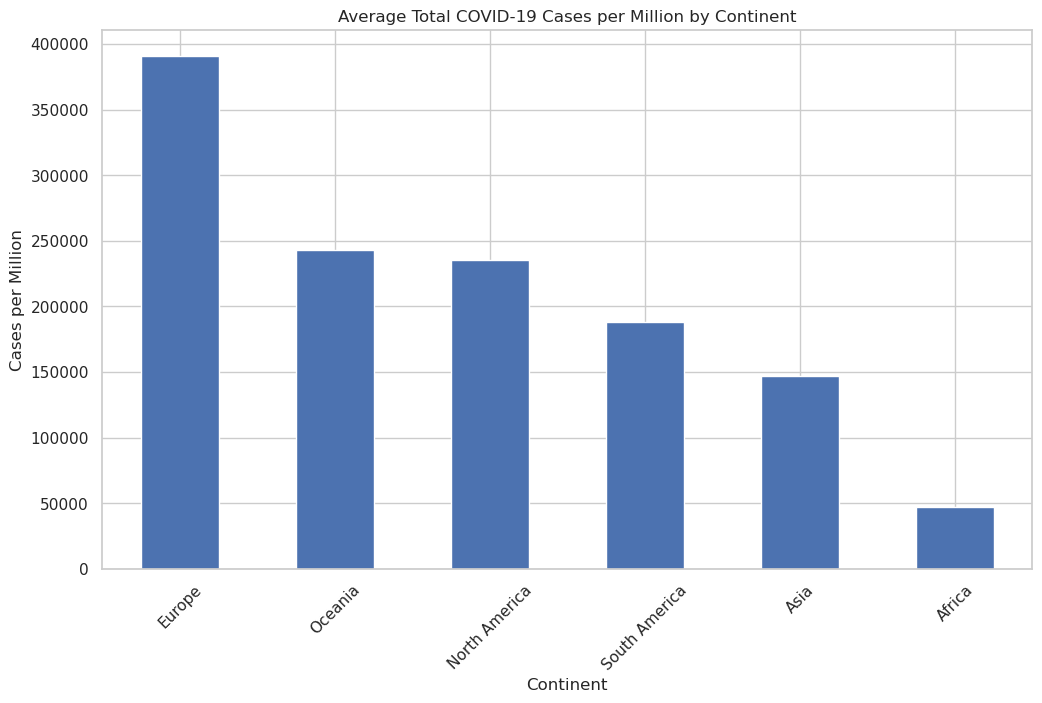


Insight 2: Top 10 Countries by Fully Vaccinated Population (%)
                     location  people_fully_vaccinated_per_hundred
                        Macao                                92.39
                    Hong Kong                                90.85
                       Taiwan                                87.02
              Northern Cyprus                                81.78
                     Malaysia                                81.18
Upper-middle-income countries                                78.81
        High-income countries                                74.31
          European Union (27)                                72.86
                    Lithuania                                68.40
                        India                                67.18


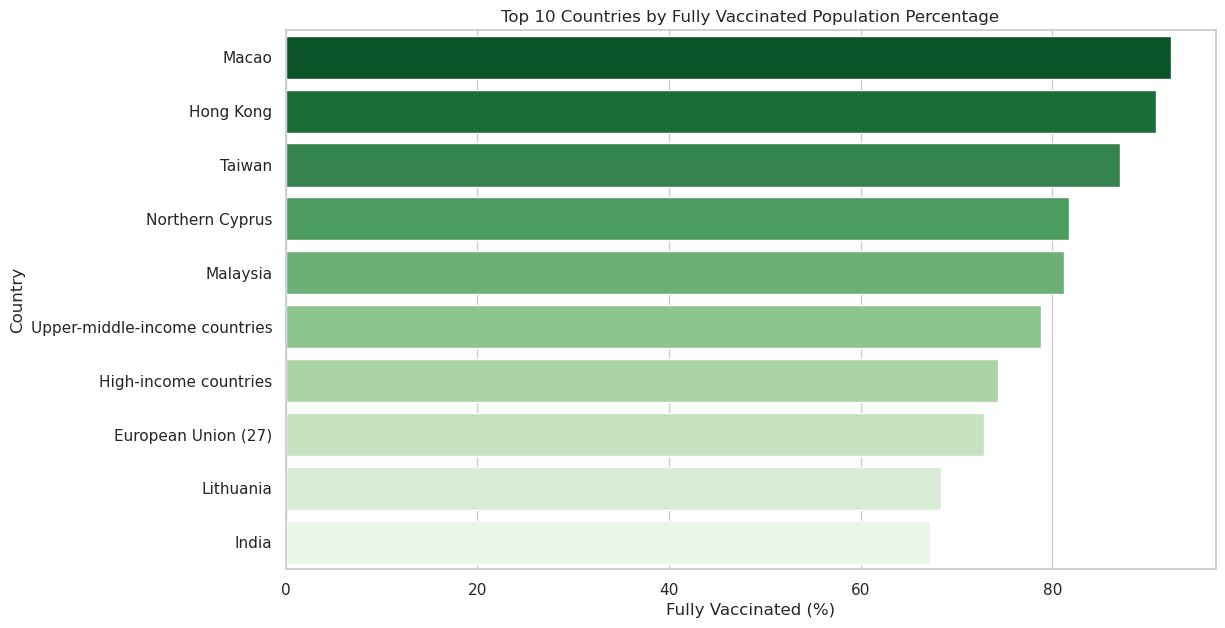

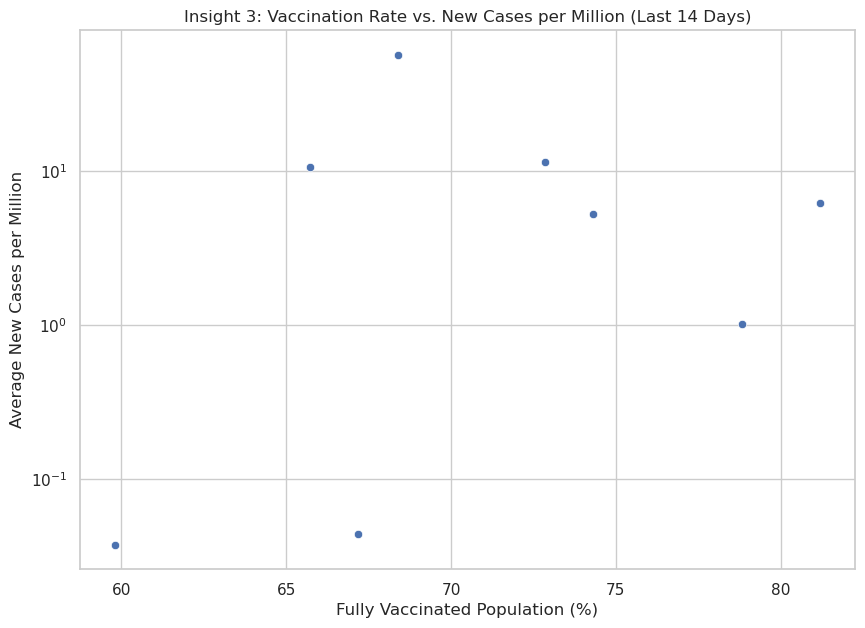


Insight 4: Top 10 Countries by Total Deaths per Million
              location  total_deaths_per_million
                  Peru                  6601.110
              Bulgaria                  5669.613
       North Macedonia                  5422.131
Bosnia and Herzegovina                  5114.820
               Hungary                  5065.206
               Croatia                  4799.552
              Slovenia                  4766.858
               Georgia                  4519.362
            Montenegro                  4317.904
               Moldova                  4027.978


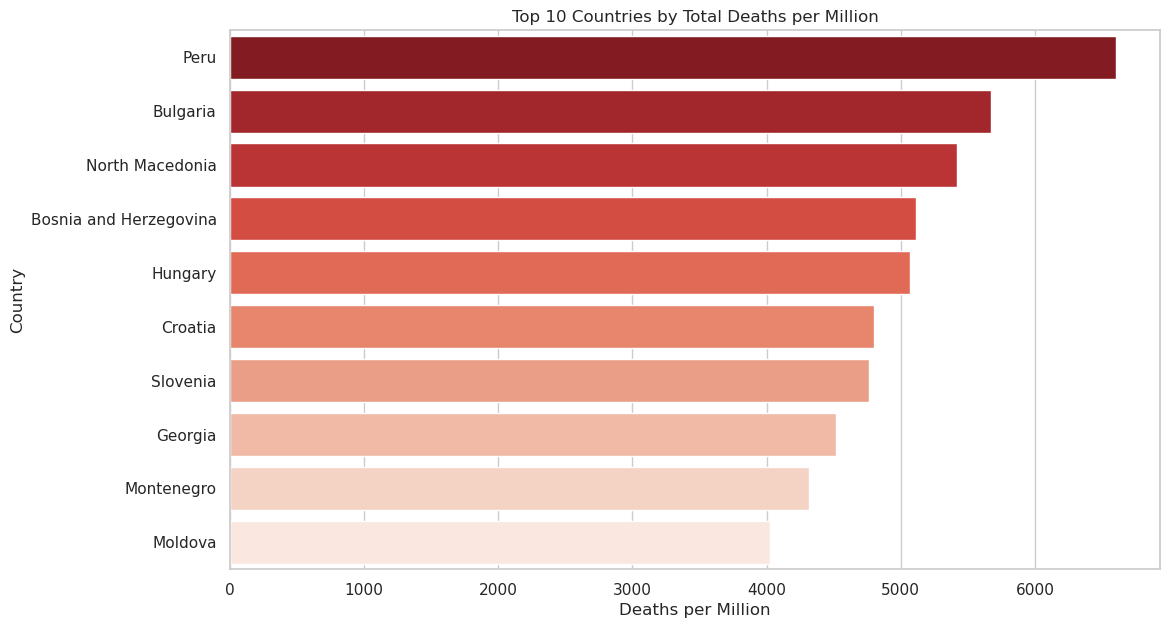


Insight 5: Top 10 Countries by Test Positivity Rate (%)
            location  positivity_rate
 Trinidad and Tobago              0.0
              Guyana              0.0
            Honduras              0.0
               Tonga              0.0
               Italy              0.0
           Hong Kong              0.0
         New Zealand              0.0
               India              0.0
    Saint Barthelemy              0.0
Low-income countries              0.0


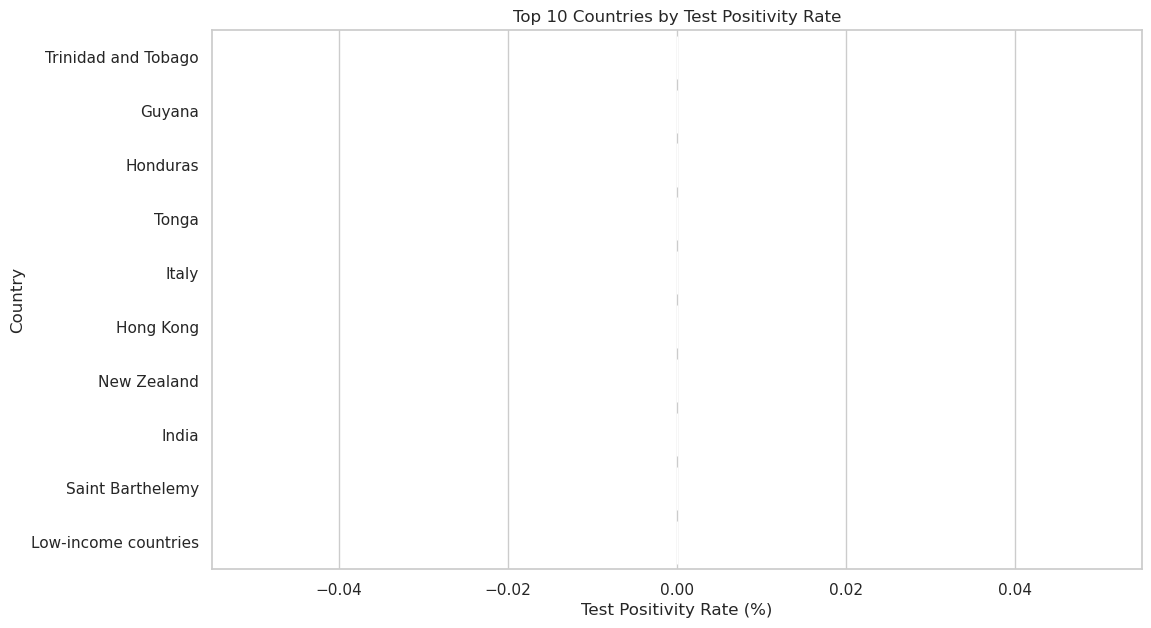


Insight 6: Top 10 Countries by Percentage Increase in New Cases (Last 14 Days vs Previous 14 Days)
                               cases_last_14  cases_prev_14  pct_increase
location                                                                 
Romania                               4633.0         4843.0     -4.336155
Poland                                2463.0         2613.0     -5.740528
Russia                                7777.0        11579.0    -32.835305
Upper-middle-income countries        14277.0        27328.0    -47.756879
China                                 2087.0         4091.0    -48.985578
Greece                                5818.0        11536.0    -49.566574
European Union (27)                  25642.0        61490.0    -58.298910
Belgium                               1277.0         3086.0    -58.619572
High-income countries                32293.0        79516.0    -59.388048
New Zealand                           1730.0         4332.0    -60.064635


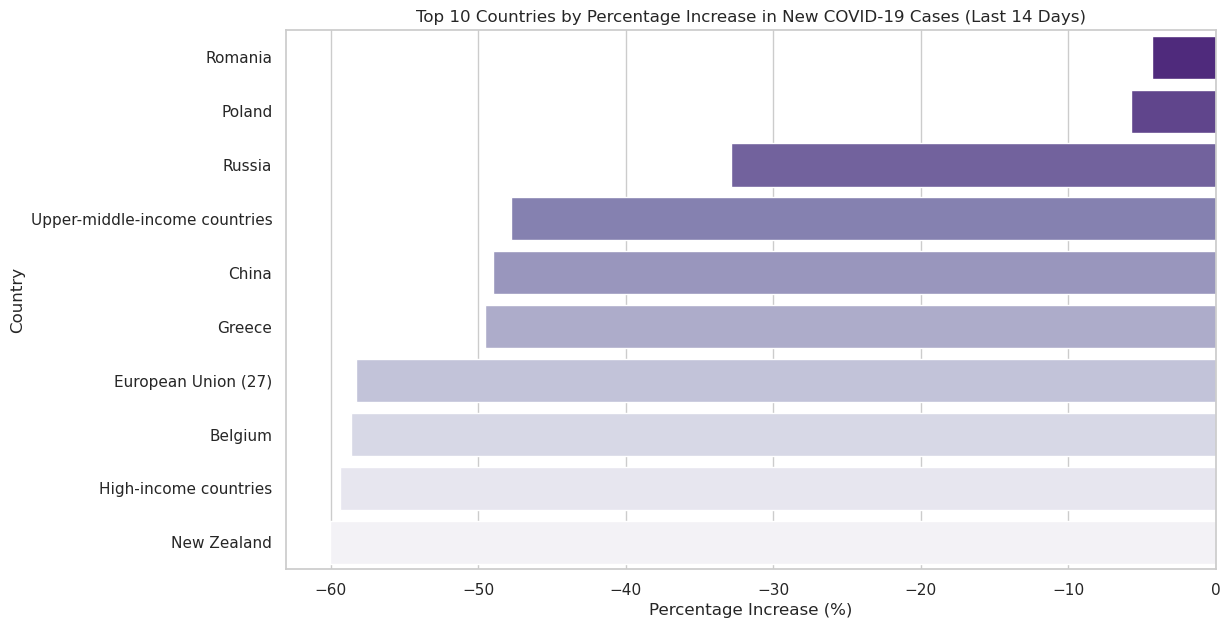

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,7)

# Load OWID COVID-19 data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, parse_dates=['date'])

# Filter out aggregate entities
exclude_entities = ['World', 'International', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
countries_df = df[~df['location'].isin(exclude_entities)].copy()

# Get latest data for each country
latest = countries_df.sort_values('date').groupby('location').tail(1).copy()

### Insight 1: Continent with highest COVID-19 cases per million
continent_cases = latest.groupby('continent').agg({
    'total_cases_per_million': 'mean'
}).sort_values('total_cases_per_million', ascending=False)

print("Insight 1: Average Total COVID-19 Cases per Million by Continent:")
print(continent_cases)

continent_cases.plot(kind='bar', legend=False)
plt.title('Average Total COVID-19 Cases per Million by Continent')
plt.ylabel('Cases per Million')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()


### Insight 2: Top 10 countries by percentage of fully vaccinated population
latest['people_fully_vaccinated_per_hundred'] = latest['people_fully_vaccinated_per_hundred'].fillna(0)
top_vaccinated = latest.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(10)[
    ['location', 'people_fully_vaccinated_per_hundred']]

print("\nInsight 2: Top 10 Countries by Fully Vaccinated Population (%)")
print(top_vaccinated.to_string(index=False))

sns.barplot(data=top_vaccinated, x='people_fully_vaccinated_per_hundred', y='location', palette='Greens_r')
plt.xlabel('Fully Vaccinated (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Fully Vaccinated Population Percentage')
plt.show()


### Insight 3: Correlation between vaccination and new cases per million
# Filter to recent dates to compare (last 14 days)
recent_date = countries_df['date'].max()
last_14_days = countries_df[countries_df['date'] >= (recent_date - pd.Timedelta(days=14))]

# Get mean new cases and mean vaccination over last 14 days for each country
summary_14d = last_14_days.groupby('location').agg({
    'new_cases_per_million': 'mean',
    'people_fully_vaccinated_per_hundred': 'max'  # latest vaccination %
}).dropna()

plt.figure(figsize=(10,7))
sns.scatterplot(data=summary_14d, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million')
plt.title('Insight 3: Vaccination Rate vs. New Cases per Million (Last 14 Days)')
plt.xlabel('Fully Vaccinated Population (%)')
plt.ylabel('Average New Cases per Million')
plt.yscale('log')
plt.show()


### Insight 4: Top 10 countries by deaths per million
top_deaths_million = latest.sort_values('total_deaths_per_million', ascending=False).head(10)[
    ['location', 'total_deaths_per_million']]

print("\nInsight 4: Top 10 Countries by Total Deaths per Million")
print(top_deaths_million.to_string(index=False))

sns.barplot(data=top_deaths_million, x='total_deaths_per_million', y='location', palette='Reds_r')
plt.xlabel('Deaths per Million')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Deaths per Million')
plt.show()


### Insight 5: Countries with high test positivity rates
# Calculate positivity rate (positive tests / total tests) for latest data
latest['total_tests'] = latest['total_tests'].replace(0, np.nan)
latest['total_cases'] = latest['total_cases'].replace(0, np.nan)

latest['positivity_rate'] = (latest['total_cases'] / latest['total_tests']) * 100
latest['positivity_rate'] = latest['positivity_rate'].fillna(0)

top_positivity = latest.sort_values('positivity_rate', ascending=False).head(10)[
    ['location', 'positivity_rate']]

print("\nInsight 5: Top 10 Countries by Test Positivity Rate (%)")
print(top_positivity.to_string(index=False))

sns.barplot(data=top_positivity, x='positivity_rate', y='location', palette='Oranges_r')
plt.xlabel('Test Positivity Rate (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Test Positivity Rate')
plt.show()


### Insight 6: Countries with biggest percentage increase in new cases in last 14 days vs previous 14 days
# Aggregate new cases in last 14 days and previous 14 days
last_14 = countries_df[(countries_df['date'] > (recent_date - pd.Timedelta(days=14))) & (countries_df['date'] <= recent_date)]
prev_14 = countries_df[(countries_df['date'] > (recent_date - pd.Timedelta(days=28))) & (countries_df['date'] <= (recent_date - pd.Timedelta(days=15)))]

cases_last_14 = last_14.groupby('location')['new_cases'].sum()
cases_prev_14 = prev_14.groupby('location')['new_cases'].sum()

# Combine and calculate percentage increase
growth_df = pd.DataFrame({
    'cases_last_14': cases_last_14,
    'cases_prev_14': cases_prev_14
}).fillna(0)

# Avoid division by zero and calculate percentage increase
growth_df['pct_increase'] = np.where(
    growth_df['cases_prev_14'] == 0,
    np.inf,
    ((growth_df['cases_last_14'] - growth_df['cases_prev_14']) / growth_df['cases_prev_14']) * 100
)

# Filter out countries with small case counts (to avoid noise)
growth_df = growth_df[growth_df['cases_last_14'] > 1000]

# Get top 10 countries with highest percentage increase
top_growth = growth_df.sort_values('pct_increase', ascending=False).head(10)

print("\nInsight 6: Top 10 Countries by Percentage Increase in New Cases (Last 14 Days vs Previous 14 Days)")
print(top_growth[['cases_last_14', 'cases_prev_14', 'pct_increase']].to_string())

top_growth.reset_index(inplace=True)
sns.barplot(data=top_growth, x='pct_increase', y='location', palette='Purples_r')
plt.xlabel('Percentage Increase (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Percentage Increase in New COVID-19 Cases (Last 14 Days)')
plt.show()
